In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc

In [2]:
data = pd.read_csv("../Downloads/diabetes.csv")

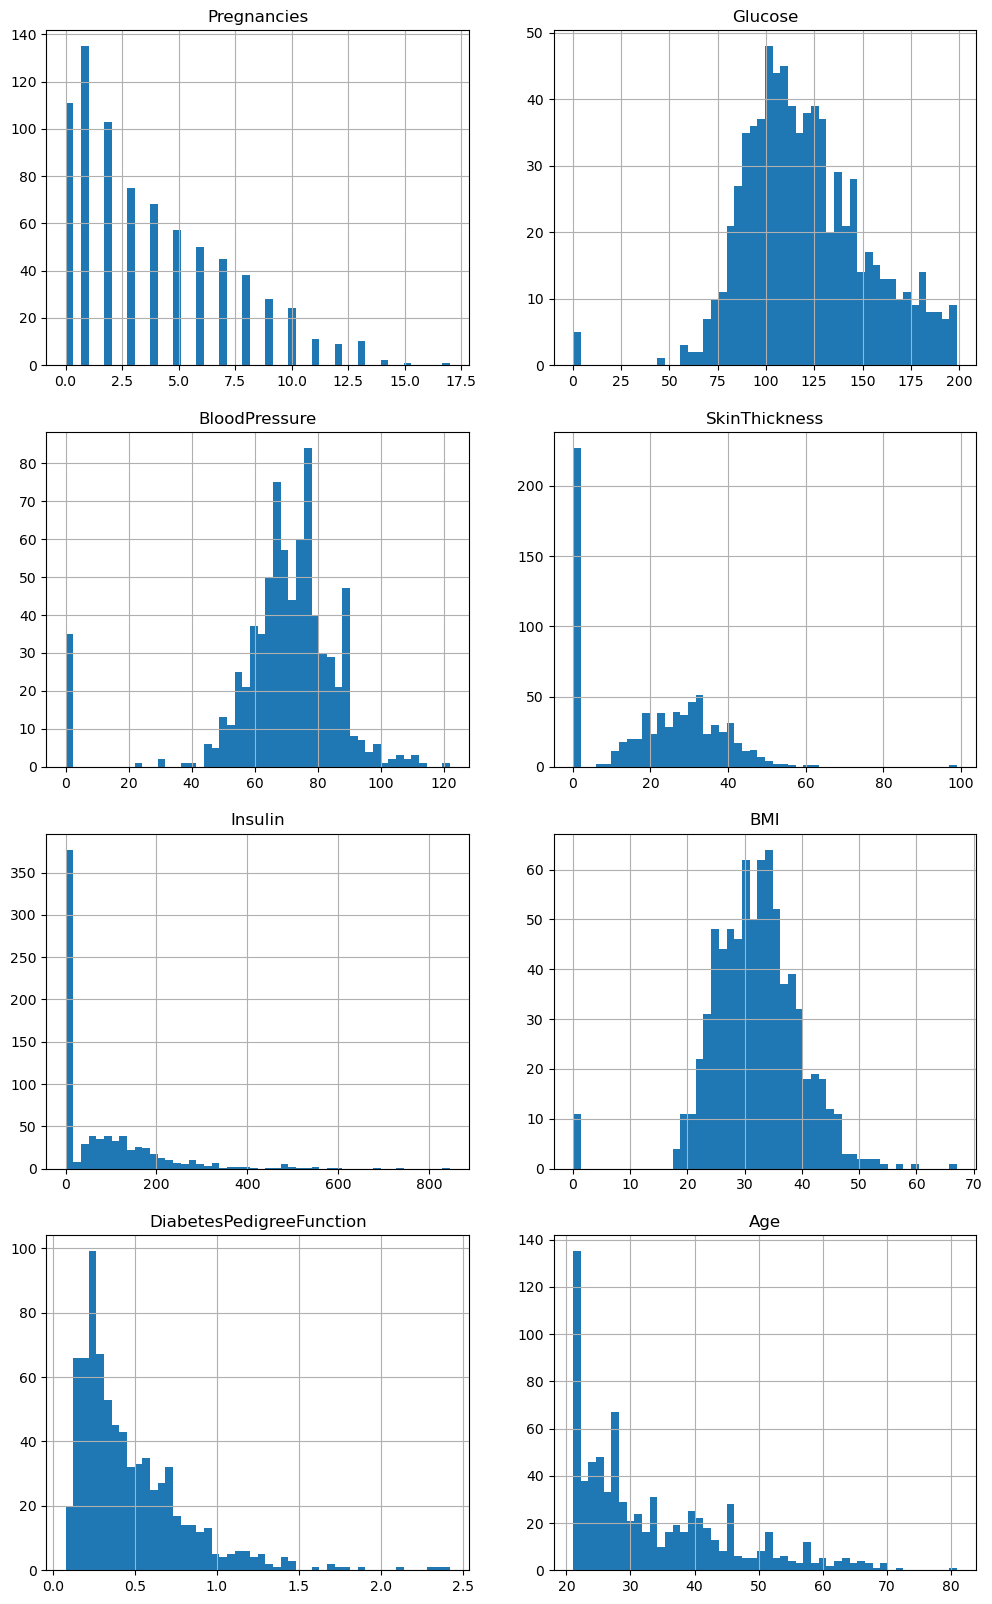

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i * 2 + j
        axs[i, j].hist(data.iloc[:, col], bins=50)
        axs[i, j].set_title(data.columns[col])
        axs[i, j].grid(True)

plt.show()

In [6]:
# Preparing data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, threshold=0.5, use_sigmoid=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.threshold = threshold
        self.weights = None
        self.bias = None
        self.use_sigmoid = use_sigmoid

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y <= 0, 0, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._sigmoid(linear_output) if self.use_sigmoid else self._step_function(linear_output)
                error = y_[idx] - y_predicted
                update = self.lr * error
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_output) if self.use_sigmoid else self._step_function(linear_output)
        return np.where(y_predicted >= self.threshold, 1, 0)

    def predict_proba(self, X):
        """Only available when using sigmoid function."""
        if not self.use_sigmoid:
            raise ValueError("Probability prediction is only available with the sigmoid function.")
        linear_output = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_output)


In [8]:
# Testing different activation functions
model_step = Perceptron(learning_rate=0.1, n_iters=1000, use_sigmoid=False)
model_step.fit(X_train, y_train)
predictions_step = model_step.predict(X_test)
acc_step = accuracy_score(y_test, predictions_step)
print(f'Accuracy with Step Function: {acc_step:.2f}')

model_sigmoid = Perceptron(learning_rate=0.1, n_iters=1000, use_sigmoid=True)
model_sigmoid.fit(X_train, y_train)
predictions_sigmoid = model_sigmoid.predict(X_test)
acc_sigmoid = accuracy_score(y_test, predictions_sigmoid)
print(f'Accuracy with Sigmoid Function: {acc_sigmoid:.2f}')


Accuracy with Step Function: 0.75
Accuracy with Sigmoid Function: 0.77


Best Learning Rate: 0.2
Best Accuracy: 0.8311688311688312


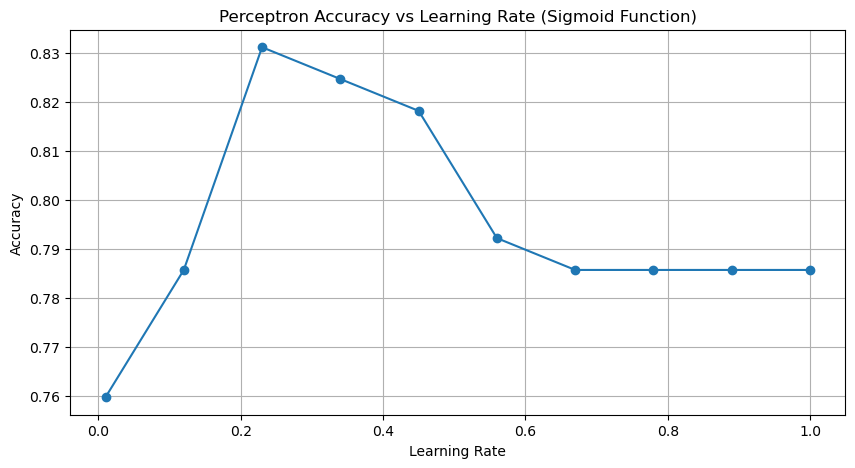

In [18]:
def test_learning_rates(X_train, y_train, X_test, y_test, learning_rates):
    best_accuracy = 0
    best_learning_rate = None
    accuracies = []
    for lr in learning_rates:
        model = Perceptron(learning_rate=lr, use_sigmoid=True)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)
        if acc > best_accuracy:
            best_accuracy = acc
            best_learning_rate = lr
    return accuracies, best_learning_rate, best_accuracy

# Range of learning rates to test
learning_rates = np.linspace(0.01, 1, 10)

# Test learning rates and find the best model
accuracies, best_learning_rate, best_accuracy = test_learning_rates(X_train, y_train, X_test, y_test, learning_rates)

# Print the best learning rate and its accuracy
print(f'Best Learning Rate: {best_learning_rate:.1f}')
print(f'Best Accuracy: {best_accuracy}')

# Plotting accuracy vs. learning rate
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Perceptron Accuracy vs Learning Rate (Sigmoid Function)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



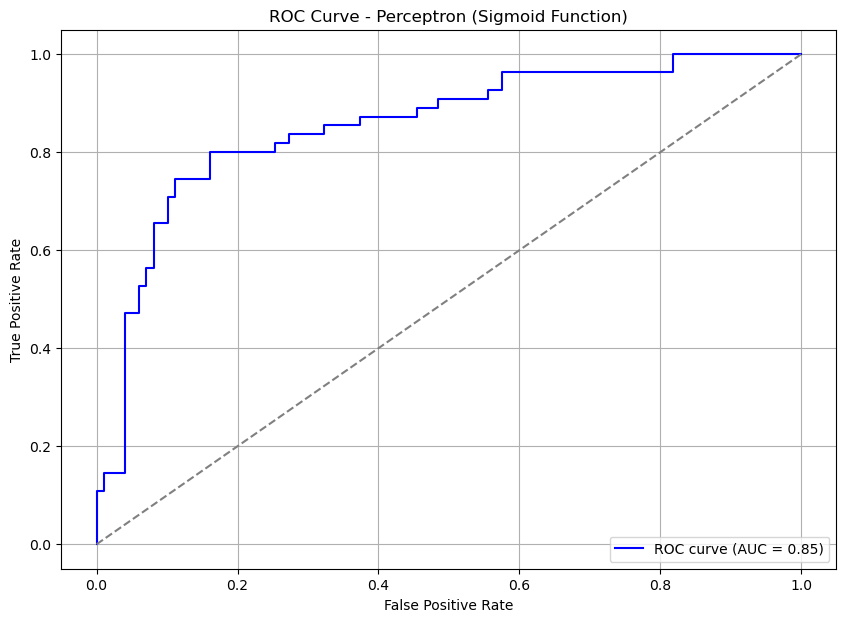

AUC for the best sigmoid model: 0.85


In [19]:
# Using the best sigmoid model 
best_model_sigmoid = Perceptron(learning_rate=best_learning_rate, n_iters=1000, use_sigmoid=True)
best_model_sigmoid.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_prob = best_model_sigmoid.predict_proba(X_test)

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Perceptron (Sigmoid Function)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Printing AUC value
print(f'AUC for the best sigmoid model: {roc_auc:.2f}')